# **Introduction**
For our final project, Vik and I eventually decided that we would use a vague metric of General Safety and Quality of Life. At first we browsed through the WRPDC website for different datasets, and at first we were going to use 311 calls, Air Quality, and Arrests. However, when we looked into those datasets, we realized that for the 311 calls and the air quality datasets that rather than neighborhoods in Pittsburgh, they had cities in the Western Pennsylvania region. So after looking a little further, we decided that we would use datasets for arrests, fires, and non-violent traffic tickets as those three datasets separate cases into the exact same neighborhoods.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16295 non-null  int64  
 1   PK                     16295 non-null  int64  
 2   CCR                    16295 non-null  object 
 3   GENDER                 16232 non-null  object 
 4   RACE                   16214 non-null  object 
 5   AGE                    16223 non-null  float64
 6   CITEDTIME              16295 non-null  object 
 7   INCIDENTLOCATION       16295 non-null  object 
 8   OFFENSES               16295 non-null  object 
 9   NEIGHBORHOOD           15379 non-null  object 
 10  ZONE                   16295 non-null  object 
 11  INCIDENTTRACT          15383 non-null  object 
 12  COUNCIL_DISTRICT       14453 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14453 non-null  float64
 14  X                      14493 non-null  float64
 15  Y 

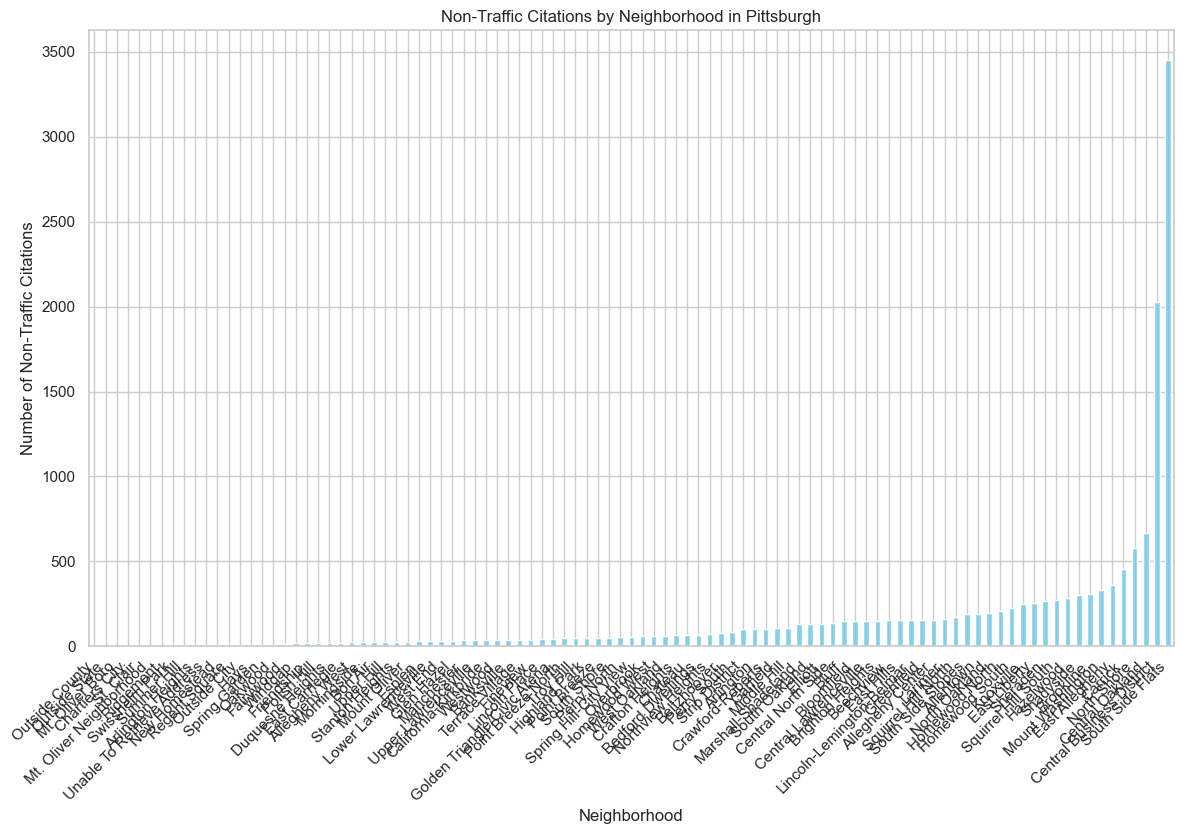

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
url = "https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86"
df = pd.read_csv(url)

# Display basic information about the dataset
df.info()
df.head()

# Select the relevant column for analysis
df = df[['NEIGHBORHOOD']]

# Drop rows with missing values in the 'NEIGHBORHOOD' column
df.dropna(subset=['NEIGHBORHOOD'], inplace=True)

# Count the number of citations per neighborhood
citation_counts = df['NEIGHBORHOOD'].value_counts()

# Display neighborhoods with the fewest citations (assumed to be the "best" neighborhoods)
print("Top neighborhoods by least citations:")
print(citation_counts.nsmallest(10))

# Plot citation counts by neighborhood
plt.figure(figsize=(14, 8))
citation_counts_sorted = citation_counts.sort_values()
citation_counts_sorted.plot(kind='bar', color='skyblue')
plt.title("Non-Traffic Citations by Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Non-Traffic Citations")
plt.xticks(rotation=45, ha='right')
plt.show()

## Pittsburgh Police Arrests Data

The Pittsburgh Police Arrests Data contains primarily arrest data from 2016-2023. I chose to utilize the number of arrests made in each neighborhood. I believe that this data is very important when establishing the safety of a community, as the lower the crime rate, the safer the neighborhood is. 

In [48]:

import pandas as pd

#Arrests Data
arrests = pd.read_csv("arrestsdata.tsv", sep="\t")
nha_ranking = dict()
usnha_counter = dict()


for index, row in arrests.iterrows():
    nh = row['INCIDENTNEIGHBORHOOD']
    if nh not in usnha_counter:
        usnha_counter[nh] = 1
        nha_ranking[nh] = 0;
    else:
        usnha_counter[nh] += 1
nha_counter = dict(sorted(usnha_counter.items(), key=lambda item: item[1]))


i=1
for x in nha_counter:
    for a in nha_ranking:
        if a == x:
            nha_ranking[a] = i
    i+=1
nha_ranking = dict(sorted(nha_ranking.items(), key=lambda item: item[1]))

for nh,values in nha_counter.items():
    print(nh, ":", values)



Mt. Oliver Neighborhood : 2
Troy Hill-Herrs Island : 6
Mt. Oliver Boro : 18
Central Northside : 23
Regent Square : 37
Ridgemont : 37
New Homestead : 39
Swisshelm Park : 43
Chartiers City : 46
East Carnegie : 48
St. Clair : 55
Outside County : 57
Outside State : 67
Summer Hill : 76
Oakwood : 82
Golden Triangle/Civic Arena : 83
Hays : 120
Mount Oliver : 124
Windgap : 124
Fairywood : 127
Allegheny West : 130
Arlington Heights : 155
Polish Hill : 166
Glen Hazel : 169
Friendship : 174
Morningside : 188
Upper Lawrenceville : 189
Duquesne Heights : 191
Esplen : 200
Spring Garden : 219
Stanton Heights : 223
Westwood : 226
Lincoln Place : 227
Bon Air : 267
Lower Lawrenceville : 272
Point Breeze North : 289
West End : 290
Squirrel Hill North : 290
Banksville : 291
Terrace Village : 297
Point Breeze : 301
South Shore : 301
Arlington : 312
California-Kirkbride : 315
Outside City : 316
West Oakland : 325
Overbrook : 331
South Oakland : 354
Upper Hill : 370
Central Lawrenceville : 431
Troy Hill : 43

### Analysis of Arrest Data 

After finding the number of crimes in each neighborhood, I ranked them and put made three different bar graphs showing the number of crimes in each neighborhood. Based on the data, the safest neighborhood is Mt. Oliver Neighborhood. There are definitely flaws in my logic though. For instance, there is Mt. Oliver Neighborhood, Mt. Oliver Boro, and Mount Oliver which may all account for the same neighborhood. At the same time, for any sexual crimes, there is no neighborhood assigned. 

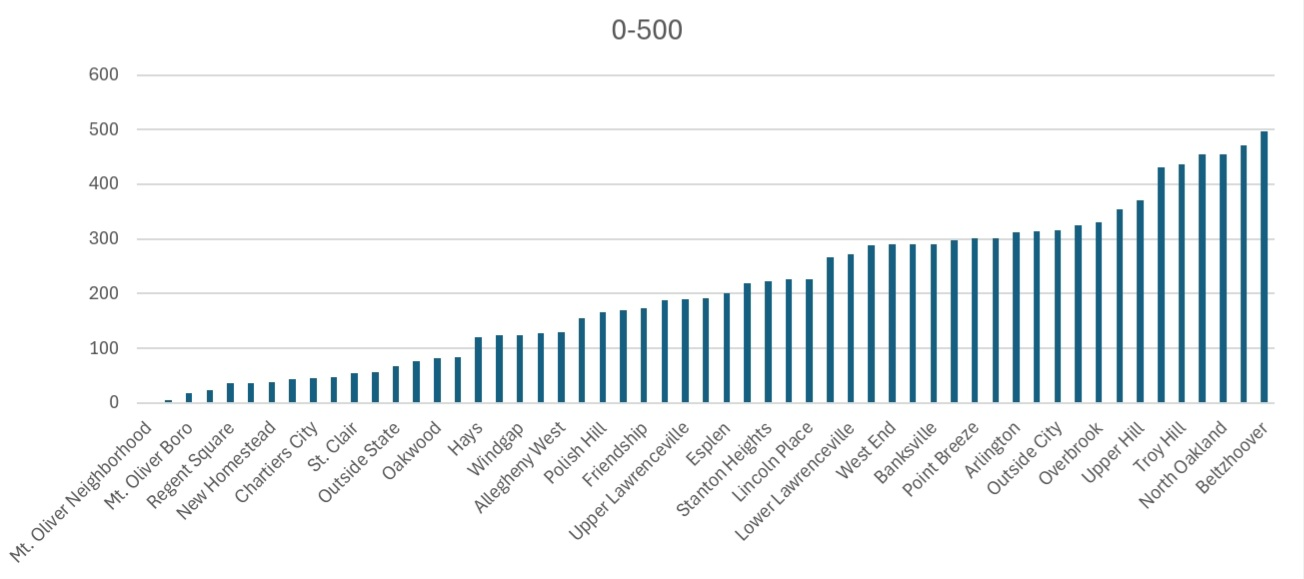
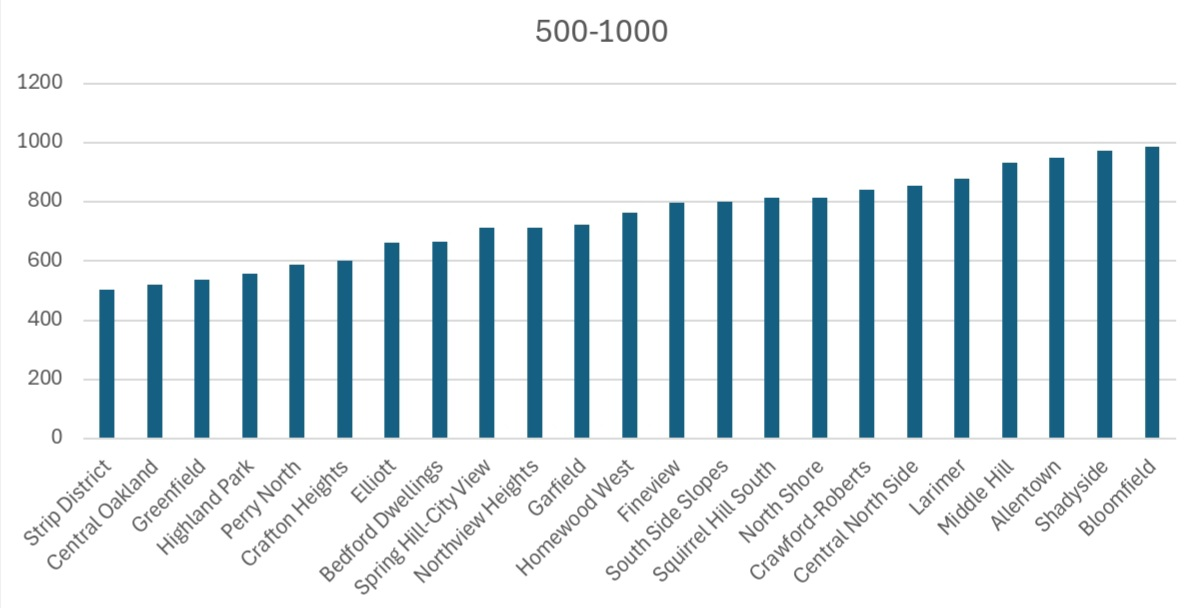
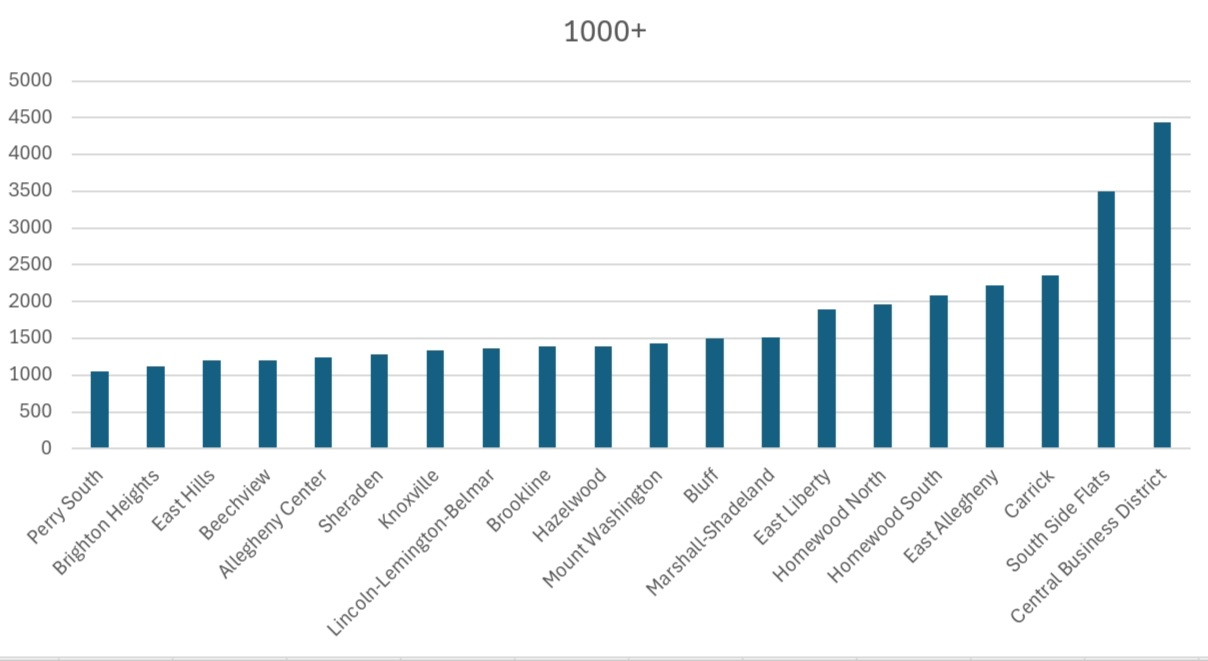

## Fire Incidents in City of Pittsburgh

The second dataset that I used was a collection of fire incidents from 2013-present day. I chose to utilize the number of fire in each neighborhood, regardless of how big or small the incident was. Fires can be a major hazard to quality of life, and general safety/ability to life, so I felt that this was integral to our metric of general safety.

In [5]:
#Fire Data
import pandas as pd

fires = pd.read_csv("firedata.tsv", sep="\t")
nhf_ranking = dict()
usnhf_counter = dict()

for index, row in fires.iterrows():
    nh = row['neighborhood']
    if nh not in usnhf_counter:
        usnhf_counter[nh] = 1
        nhf_ranking[nh] = 0;
    else:
        usnhf_counter[nh] += 1
        
nhf_counter = dict(sorted(usnhf_counter.items(), key=lambda item: item[1]))

i=1
for x in nhf_counter:
    for a in nhf_ranking:
        if a == x:
            nhf_ranking[a] = i
    i+=1
nhf_ranking = dict(sorted(nhf_ranking.items(), key=lambda item: item[1]))

for nh,values in nhf_counter.items():
    print(nh, ":", values)

Mount Oliver Borough : 6
Regent Square : 9
East Carnegie : 11
Ridgemont : 12
Mt. Oliver : 12
Arlington Heights : 13
Oakwood : 13
St. Clair : 14
Swisshelm Park : 17
Chartiers City : 18
Glen Hazel : 20
Summer Hill : 21
Bon Air : 22
New Homestead : 22
West End : 23
Esplen : 23
Windgap : 24
Hays : 24
Fairywood : 26
Spring Garden : 26
South Shore : 26
Westwood : 28
Friendship : 33
Morningside : 35
Polish Hill : 39
Duquesne Heights : 41
Allegheny West : 43
California-Kirkbride : 43
Chateau : 43
Bedford Dwellings : 47
Fineview : 50
Upper Hill : 50
Point Breeze North : 51
Arlington : 52
Upper Lawrenceville : 56
Banksville : 60
Overbrook : 61
Stanton Heights : 62
Allegheny Center : 63
Homewood West : 63
Lower Lawrenceville : 63
West Oakland : 64
Northview Heights : 67
Lincoln Place : 69
Elliott : 72
Point Breeze : 72
Strip District : 75
North Shore : 77
Central Lawrenceville : 79
Highland Park : 79
Manchester : 82
Crafton Heights : 85
Troy Hill : 85
Terrace Village : 87
Central Oakland : 98
Sou

### Analysis of Fire Incidents in City of Pittsburgh
After finding the number of fires in each neighborhood, I ranked them and put made three different bar graphs showing the amount of fires in each neighborhood. Based on the data, the safest neighborhood is Mt. Oliver Borough. There are definitely flaws in my logic though. For instance, there is Mt. Oliver Neighborhood, Mt. Oliver Boro, and Mount Oliver which may all account for the same neighborhood. At the same time, there are 1592 fires which haven't been assigned a neighborhood. However, the data evidently shows that the neighborhood with the least amount of fires is the Mt. Oliver area.

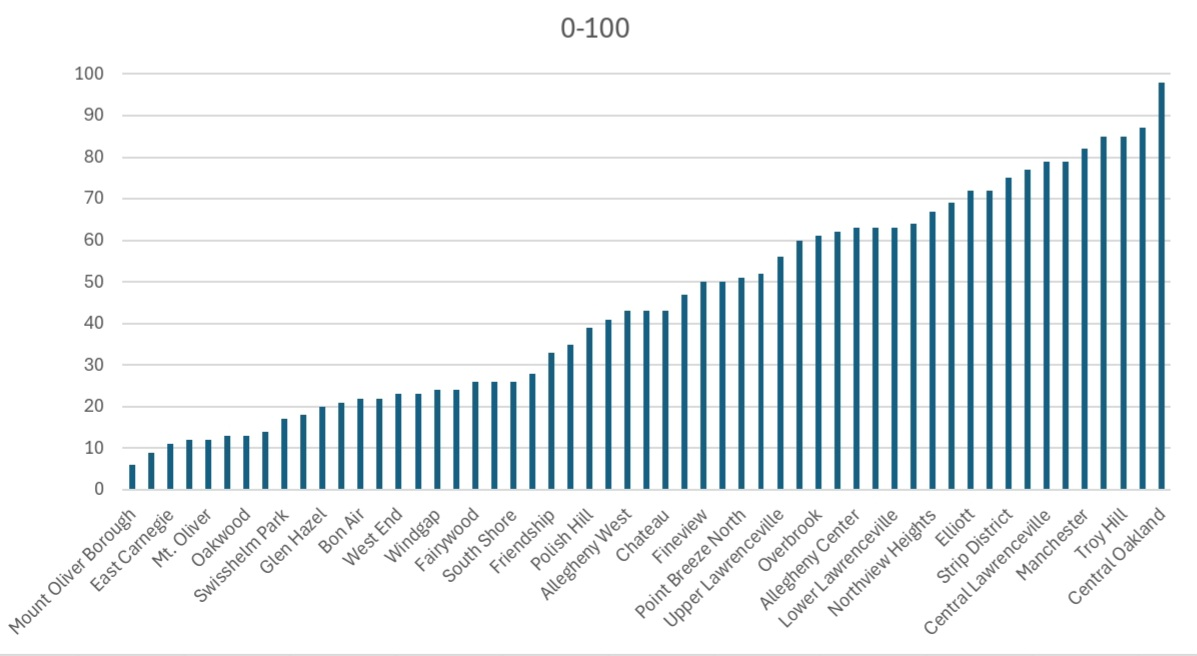
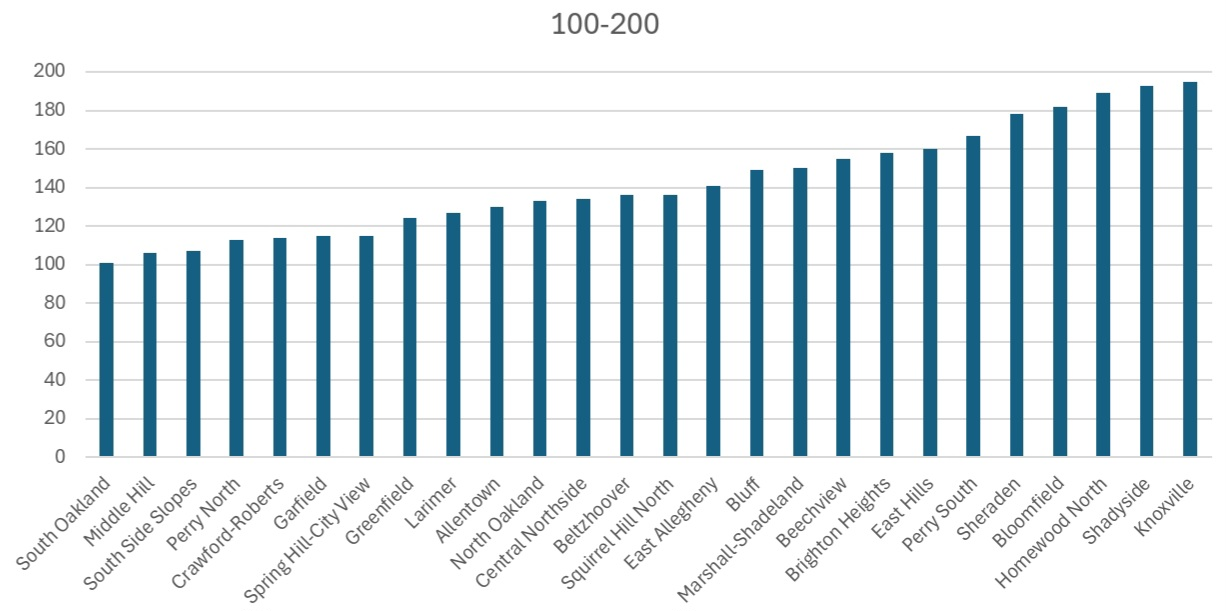
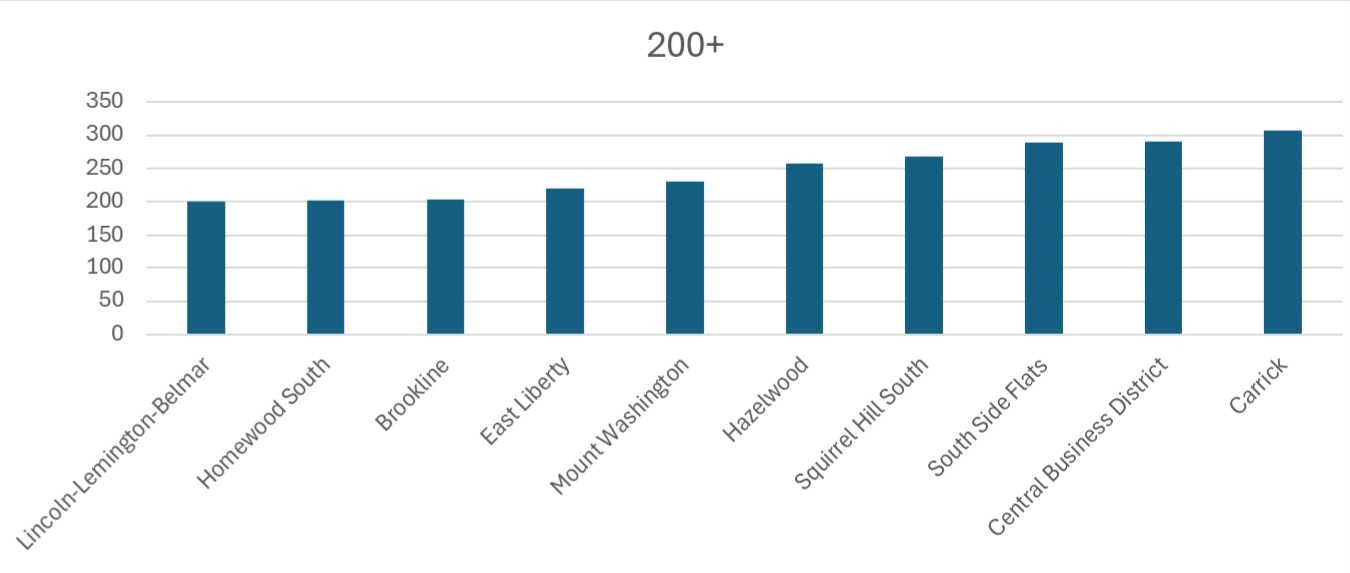

## Conclusion

Both of my datasets show the Mt. Oliver area is the safest neighborhood in Pittsburgh. While there are definite flaws in my logic, it is undeniable the amount of crime and fires the in the general area is significantly less than most others. 
Since I'm not a Pittsburgh native, my personal favorite neighborhood is Central Oakland, as that is where Pitt is and the neighborhood I am most familiar with. 